# Bubble Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from seaborn import pointplot, set_style
from pandas import DataFrame

LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000], dtype=int)

## Algoritmo

In [2]:
def bubble(arr:'np.ndarray[float]') -> None:
  i = 0
  n = len(arr)
  houve_troca = True
  while i < n-1 and houve_troca:
    i += 1
    houve_troca = False
    for j in range(n-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j]
        houve_troca = True

## Bateria de testes de desempenho

In [3]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=float)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=float)[::-1].copy()
    else:
      amostra = np.random.sample(tamanho)
    
    # testando performance
    start = perf_counter()
    bubble(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.002446,0.743835,0.783514,1000
0.000896,3.262636,3.109404,2000
0.001319,5.925726,7.238983,3000
0.001525,9.799683,12.560172,4000
0.002931,14.305327,19.264168,5000
0.003901,36.109686,48.607850,8000
0.005691,68.858072,89.580332,11000
0.007028,128.942980,165.798482,15000


## Resultados

O pior caso é quando a lista se encontra ordenada de forma decrescente


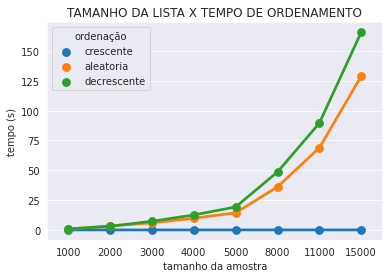

In [4]:
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')
